# Forecasting competition

To help make it easier for you to participate in our motion forecasting challenge, we provide an example notebook for the task

## A simple baseline

Let's say we have our (very very naive) prediction function;

In [1]:
def prediction(trajectory,num_points=30,avg_points=1):
    #a simple prediction function that predict straight line with constant velocity
    velocity_x_mps = []
    velocity_y_mps = []
    for i in range(1,avg_points+1,1):
        velocity_x_mps.append(trajectory[-i,0] - trajectory[-(1+i),0])
        velocity_y_mps.append(trajectory[-i,1] - trajectory[-(1+i),1])
        
    velocity_x_mps = np.mean(velocity_x_mps)
    velocity_y_mps = np.mean(velocity_y_mps)
    
    current_traj = trajectory[-1]
    results = np.zeros((len(trajectory)+num_points,2))
    
    results[0:len(trajectory)] = trajectory
    
    for i in range(num_points):
        results[len(trajectory)+i] = np.array([current_traj[0]+velocity_x_mps,current_traj[1]+velocity_y_mps])
        current_traj = results[len(trajectory)+i]
    return results

Let's try that on our argoverse forecasting test set

In [4]:
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader

##set root_dir to the correct path to your dataset folder
root_dir = '../../deep_prediction/data/test_obs/data'

afl = ArgoverseForecastingLoader(root_dir)

print('Total number of sequences:',len(afl))
print('agent traj shape:', afl[0].agent_traj.shape)

Total number of sequences: 78143
agent traj shape: (20, 2)


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [5]:
afl = afl[111]
predict_traj = prediction(afl.agent_traj,avg_points=5)
print(predict_traj.shape)

(50, 2)


Here is an example of our prediction, initial trajectory in blue and the predicted trajectory in red

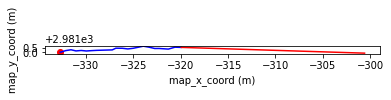

In [6]:
ax = plt.gca()
plt.plot(predict_traj[0,0],predict_traj[0,1],'-o',c='r') #starting point here
plt.plot(predict_traj[:21,0],predict_traj[:21,1],'-',c='b')
plt.plot(predict_traj[20:,0],predict_traj[20:,1],'-',c='r')

plt.xlabel('map_x_coord (m)')
plt.ylabel('map_y_coord (m)')
ax.set_aspect('equal')
plt.show()

Due to the multimodal nature of the problem, our challenge allows for (expects) multiple forecasts for each object.

For the purposes of this tutorial we will use different averaging windows to create multiple entries per object.

In [7]:
def get_multiple_forecasts(afl):
    predict_traj = []
    for i in range(9,3,-1):
        predict_traj.append(prediction(afl.agent_traj,avg_points=(i)))
    return np.array(predict_traj)

In [8]:
predict_traj = get_multiple_forecasts(afl)

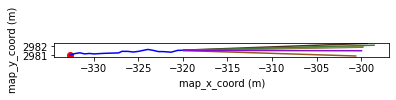

In [9]:
ax = plt.gca()

plt.plot(predict_traj[0,0,0],predict_traj[0,0,1],'-o',c='r') #starting point here
plt.plot(predict_traj[0,:21,0],predict_traj[0,:21,1],'-',c='b')

for i in range(len(predict_traj)):
    plt.plot(predict_traj[i,20:,0],predict_traj[i,20:,1],'-',c=np.random.rand(3,))
plt.xlabel('map_x_coord (m)')
plt.ylabel('map_y_coord (m)')
ax.set_aspect('equal')
plt.show()


## Compute all the results

In [11]:
output_all = {}
counter = 1
for data in afl:
#     print('\r'+str(counter)+'/'+str(len(afl)),end="")
    predict_traj = get_multiple_forecasts(data)
    seq_id = int(data.current_seq.name[:-4])
    output_all[seq_id] = predict_traj[:,20:50,:]
    counter += 1
    print(seq_id)
    if counter>1000:
        break
    

56283
18521
1583
31217
68745
9935
62800
47694
72060
50147
69750
67924
63973
63877
61308
4580
8605
62249
79664
25219
13323
45814
47568
35355
27614
7739
57448
14293
7089
62218
71747
3306
2312
3723
16990
61502
73635
30418
35178
34656
16607
70967
51838
37380
40446
53915
78233
50684
22171
36765
19572
53239
20534
65335
41441
43898
49536
17205
16536
26705
7643
41051
9177
59456
17528
31050
80042
15128
44325
17526
71508
23524
69817
41124
50921
35295
80477
24703
6022
36461
4701
40526
11393
19510
56897
35170
13599
21722
1869
58878
37701
19561
61842
73514
77160
72495
63993
13612
75669
35128
59850
7818
74654
59351
25691
3677
33114
5269
76891
416
71154
25017
44446
4907
6233
21664
10834
25457
45431
65274
57735
18944
78125
17469
3712
11263
45632
10264
5389
62005
33792
31747
66037
59561
42692
4924
61254
6521
13748
1892
15326
52899
67936
34799
49630
3764
72853
29280
32979
11180
838
16834
67870
42163
44631
9800
37665
21362
43547
25392
10880
35530
15393
48091
80527
29170
56196
53521
43383
37330
35806
6444

In [ ]:
data.current_seq.name

In [ ]:
len(output_all)

## Generate the result file

To participate in our competition, you need to upload the result file to our evaluation server on EvalAI https://evalai.cloudcv.org/. Make sure that your results are in the right format, and then call our helper function `generate_forecasting_h5`

In [ ]:
# from argoverse.evaluation.competition_util import generate_forecasting_h5

# output_path = '../../sgan/scripts/new_eval/'

# generate_forecasting_h5(output_all, output_path) #this might take awhile

You are all set!! 

Simply upload the output file `competition_files/argoverse_forecasting_baseline.h5` to our evaluation server on https://evalai.cloudcv.org/ and see how well you did it

In [12]:
output_all

{56283: array([[[  14.16134481, 3252.54037204],
         [  14.74076638, 3252.57159954],
         [  15.32018796, 3252.60282704],
         [  15.89960954, 3252.63405454],
         [  16.47903112, 3252.66528204],
         [  17.05845269, 3252.69650954],
         [  17.63787427, 3252.72773704],
         [  18.21729585, 3252.75896454],
         [  18.79671742, 3252.79019204],
         [  19.376139  , 3252.82141954],
         [  19.95556058, 3252.85264704],
         [  20.53498215, 3252.88387454],
         [  21.11440373, 3252.91510204],
         [  21.69382531, 3252.94632954],
         [  22.27324689, 3252.97755704],
         [  22.85266846, 3253.00878455],
         [  23.43209004, 3253.04001205],
         [  24.01151162, 3253.07123955],
         [  24.59093319, 3253.10246705],
         [  25.17035477, 3253.13369455],
         [  25.74977635, 3253.16492205],
         [  26.32919792, 3253.19614955],
         [  26.9086195 , 3253.22737705],
         [  27.48804108, 3253.25860455],
         

In [13]:
key_storage=output_all.keys()


In [14]:
key_storage=list(key_storage)

In [15]:
key_storage.sort()

In [16]:
max(key_storage)

80599

In [19]:
key_storage[999]

80599

In [ ]:
key_storage[78142]

In [22]:
output_all[80599].shape

(6, 30, 2)